In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time
import random

# description


data ที่ใช้จะเป็น Chest X-Ray Images (Pneumonia)
 * เป็นข้อมูลภาพ X-Ray ของ Lung โดยรวมรูป ปอดที่อักเสพเเล้วปอดที่ไม่อักเสพ ทั้งหมด 5856 รูป
 * ข้อมูลเป็นข้อมูล Raw ดิบ โดยขนาดหรือความคมชัดเเต่ละรูปนั้นไม่เท่ากัน จึงยากต่อการ Train
 * updated 3 years ago (Version 2)


Tpye JPEG
 * ฟล์ประเภท JPEG หรือ JPG ( Joint Photographic Expers Group )
      เป็นไฟล์ที่มีคุณภาพสูง ที่ผ่านกระบวนการบีบอัด อาจมีขนาดเหลือเพียง 10 - 30 % ขนาดของการบีบข้อมูล มีได้ 3 ระดับ ( High , Middle , Low Compression )

class NOMAL, PNEUMONIA


# ความท้าทายในโจทย์นี้
 * โจทย์นี้เป็นข้อมูลทางการเเพทย์ ที่ลายละเอียดสูง
 * ข้อมูลรูป raw ที่ไม่มีการจัดเตรียมอะไรไว้ให้เลย 
 * ข้อมูลที่อ่านเข้ามา นั้นมีขนาด เเต่ละรูป เเละความคมชัดที่เเตกต่างกัน
 * จัดการข้อมูลทั้งหมด เเละ จัดการทรัพยากรให้เครื่องพอที่จะ Train ได้
 * เลือก Model เหมาะสม

.
.
.

# เเสดงภาพที่เป็น NOMAL

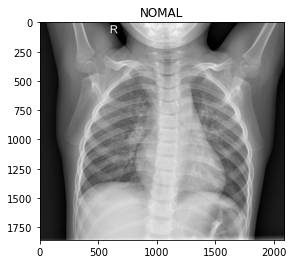

(1858, 2090, 3)

In [2]:
nomal1 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\IM-0115-0001.JPEG')
plt.imshow(nomal1)
plt.title('NOMAL')
plt.show()
nomal1.shape

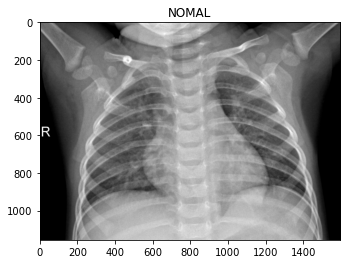

(1156, 1596, 3)

In [3]:
nomal2 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\IM-0145-0001.JPEG')
plt.imshow(nomal2)
plt.title('NOMAL')
plt.show()
nomal2.shape

# เเสดงภาพที่เป็น PNEUMONIA

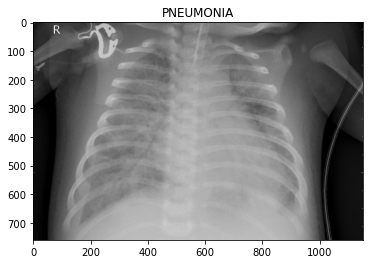

(760, 1152, 3)

In [4]:
pm1 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\person1000_bacteria_2931.JPEG')
plt.imshow(pm1)
plt.title('PNEUMONIA')
plt.show()
pm1.shape

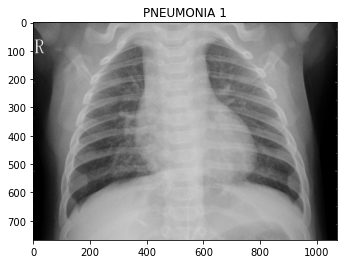

(768, 1072, 3)

In [5]:
pm2 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\person1000_virus_1681.jpeg')
plt.imshow(pm2)
plt.title('PNEUMONIA 1')
plt.show()
pm2.shape

# function นี้สร้างไว้เพื่อมาเเบ่งข้อมูล input เเล้ว target ออกจากกัน
   * ฟังก์ชั่นนี้ สร้างไว้สำหรับ เเบ่งข้อมูล รูป กับ class จะreturn ออกไปเป็น 
   * inputs ที่เป็นข้อมูลภาพ
   * targets ข้อมูลที่ระบุว่าภาพนั้นเป็น class อะไร

In [6]:

def splitFeature(datas): 
    
    inputs = []
    targets = []
    
    for x, y in datas:
        inputs.append(x)
        targets.append(y)
    
    return inputs, targets
        

function สำหรับ ทำ ข้อมูล targets ให้อยู่ในรูปเเบบ oneHot encoder

In [7]:
def oneHot(data, n_class):
    y = np.zeros((data, n_class))
    for i, y in enumerate(data):
        y[i, data[i]] = 1
        print(y)
    return y
    

# Function ที่เอาข้อมูล ที่เเบ่ง NOMAL กับ PNEUMOIN ที่เเยกกันอยู่เข้ามาเก็บไว้ให้เป็นก้อนเดียวกัน
 * ฟังชั่นที่เป็นฟังก์ชั่น ที่ใช้ได้เเค่ Data PNEUMONIA เท่านั้น สร้างมาเพื่อเเก้ไขข้อมูลที่เเยกกกันอยู่เพียงทำนั้น
 * จะมีการส่งค่า class ให้เป็น OneHot Encoder อีกด้วย 

In [8]:
def concatData(n, p):
    features_nomal = []
    targets_nomal = []
    
    
    features_pneumoni = []
    targets_pneumoni = []
    
    for f, t in n:
        features_nomal.append(f)
        targets_nomal.append(t)

    x_nomal = np.array(features_nomal)
    y_nomal = np.array(targets_nomal)
    

    for f, t in p:
        features_pneumoni.append(f)
        targets_pneumoni.append(t)
        
    
    x_pneumoni = np.array(features_pneumoni)
    y_pneumoni = np.array(targets_pneumoni)
    
    X = np.concatenate((x_nomal, x_pneumoni))
    Y = np.concatenate((y_nomal, y_pneumoni))
    
    Y = tf.one_hot(Y, 2)
    
    return np.array(X), Y

# สร้าง Function ทำหรับโหลดข้อมูลมาจัดเก็บไว้ LIST 
 * เนื่องจาก Data นั้น เก็บไว้ในเครื่องคอมพิวเตอร์ จึงจำเป็นต้องโหลดข้อมูลเข้ามาเก็บไว้ 
 * เเต่ว่าข้อมูลที่อ่านเข้ามานั้นเป็นรูป จะไม่สามารถ Train ได้ จึงใช้ Lib ช่วย ในการอ่านไฟล์รูปเข้ามาเป็น Array ได้ โดยใช้ cv2
 * รูปที่อ่านเข้ามานั้นจะถูกจัดเก็บไว้ใน Paramiter ที่ส่งเข้ามา appended-list พร้อมกับ class_type ที่ส่งเข้าไปพร้อมกันกับ     ข้อมูลรูป จะได้เป็น 
 * appended-list [รูปที่อ่านเข้ามาเป็นArray, ตัวเลขที่ระบุว่ารูปที่อ่านเข้ามานั้นคืออะร]

In [9]:

def image_import (img_path, class_type, appended_list):
    
    for i in os.listdir(img_path):
        read_path = os.path.join(img_path, i)
        
        try:
            img = cv2.imread(read_path)# return Array 
            img = cv2.resize(img, (224, 224))
        
            appended_list.append([img/255., class_type])
            
        except Exception as e:
            print(f'Image error: {i}')
            pass

In [10]:
train_pneumoni = []
train_nomal = []

test_nomal = []
test_pneumoni = []

val_nomal = []
val_pneumoni = []

* จะเห็นได้เลยว่า การจัดเก็บข้อมูล NOMAL กับ PNEUMONI นั้น อยู่คนละ ตัวเเปรกัน จึงต้องสร้าง Function concatData เพื่อมาจัดการรวมเอาข้อมูลทั้งหมดมารวมกันไว้ในตัวเเปรเดียว

In [11]:
path_train_pneumoni = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\train\PNEUMONIA'
image_import(path_train_pneumoni,2, train_pneumoni)

path_train_nomal = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\train\NORMAL'
image_import(path_train_nomal, 1,train_nomal)


In [12]:
path_test_pneumoni = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\test\PNEUMONIA'
path_test_nomal = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\test\NORMAL'

image_import(path_test_pneumoni,2, test_pneumoni)
image_import(path_test_nomal, 1, test_nomal)

# รวมชุด Train

In [13]:
print ('nomal', len(train_nomal))
print ('pneumoni', len(train_pneumoni))
print('all', len(train_nomal) + len(train_pneumoni))

nomal 1341
pneumoni 3875
all 5216


# รวมชุด Test

In [14]:
print ('nomal', len(test_nomal))
print ('pneumoni', len(test_pneumoni))
print('all', len(test_nomal) + len(test_pneumoni))

nomal 234
pneumoni 390
all 624


In [15]:
x_train, y_train = concatData(train_nomal, train_pneumoni)
x_test, y_test = concatData(test_nomal, test_pneumoni)

In [16]:
y_train = y_train.numpy()
y_test = y_test.numpy()

In [17]:
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)

# shuffle ป้องกัน overfitting

In [18]:

shuffled_indices = np.arange(x_train.shape[0]) #กำหนดความยาวข้อมูล
np.random.shuffle(shuffled_indices)

x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]


In [19]:
x_train.shape

(5216, 224, 224, 3)

# Create Model
 * Model ที่ใช้จะเป็น CNN โดยจะมีการนำเข้าเเบบสี 
 * Optimizer จะใช้เป็น Adam
 * Activation เป็น Relu ทั้งหมด
 * เนื่องจาก Model มีขนาดใหญ่ มาก จะทำการลดขนาดลง เพื่อง่ายต่อการ Train

Impact of imbalance data on loss function

Loss Function:

    Lcross−entropy(xi)=−(yilog(f(xi))+(1−yi)log(1−f(xi)))
    เราสามารถเขียนLoss ข้ามเอนโทรปีเฉลี่ยโดยรวมในชุดฝึกขนาด D ทั้งหมดได้
 
N as follows
    
    Lcross−entropy(D)=−1N(∑positive exampleslog(f(xi))+∑negative exampleslog(1−f(xi)))
    เมื่อเรามีข้อมูลไม่สมดุลการใช้ฟังก์ชันLossปกติจะส่งผลให้โมเดลมี biase ต่อคลาสที่มีอำนาจเหนือกว่า ทางออกหนึ่งคือการใช้         ฟังก์ชันลดน้ำหนัก การใช้ฟังก์ชันลดน้ำหนักจะปรับสมดุลของการมีส่วนร่วมในฟังก์ชันการสูญเสีย
    
    Lwcross−entropy(x)=−(wpylog(f(x))+wn(1−y)log(1−f(x))).

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

model = tf.keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Mini Batch
 * เนื่องจาก ข้อมูลขนาดใหญ่ เเล้ว Model ที่ใช้ ก็กินพลังงานสูงมาก เลยจำเป็น เเบ่งข้อมูลที่เข้าไป Train ตาม Memery ทีละก้อนๆไป ป้องกัน out of memery พร้อมกับ กการใช้ GPU เกินไป

In [21]:
tf.keras.backend.clear_session()

In [22]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator() # สร้าง Batch tensor ภาพเเบบ real-time
batch = 120
datagen.fit(x_train)
num_batch = len(x_train)/batch
prog = tf.keras.utils.Progbar(num_batch)

In [ ]:
for epoch in range(30):
  batches = 0
  for x, y in datagen.flow(x_train, y_train, batch_size=batch):# x ยังมีขนาดเดิมอยู่ที่ 28x28 จะทำการเปลี่ยน

        
    history = model.fit(x, y ,verbose=1)
    batches = batches + 1 
    prog.update(batches, values=[('loss', history.history['loss'][0])])
    if batches >= num_batch:
      print(epoch)
      break
seconds = time.time()
print("Seconds since epoch =", seconds)	